In [49]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [50]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [51]:
X_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

<Figure size 50x30 with 0 Axes>

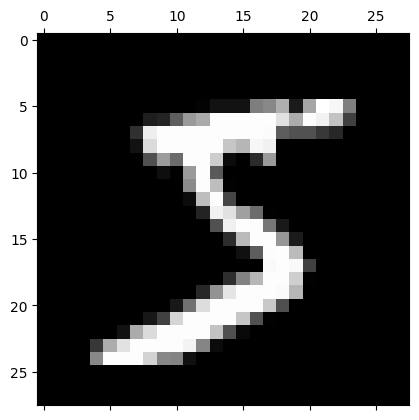

In [52]:
plt.gray()
plt.figure(figsize=(0.5,0.3))
plt.matshow(X_train[0])

In [53]:
len(X_train.ravel())

47040000

In [54]:
y_train.shape

(60000,)

In [55]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [56]:
# Without Scaling
model1 = keras.Sequential([
    keras.layers.Dense(10,input_shape= (784,),activation="sigmoid")
])

model1.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

model1.fit(X_train_flatten,y_train, epochs =5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7722 - loss: 17.9961
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.8798 - loss: 6.1867
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8809 - loss: 5.7030
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8854 - loss: 5.5999
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8865 - loss: 5.4115


In [57]:
from sklearn.preprocessing import MinMaxScaler
scm = MinMaxScaler()
X_train_scaled = scm.fit_transform(X_train_flatten)
X_test_scaled = scm.fit_transform(X_test_flatten)

In [58]:
X_test_scaled.shape

(10000, 784)

In [59]:
# Fitting with Scaled Variables
model2 = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation = "sigmoid")
])

model2.compile(
    optimizer = "adam",
    loss ='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model2.fit(X_train_scaled,y_train, epochs =5)

/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8108 - loss: 0.7253
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9133 - loss: 0.3084
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9226 - loss: 0.2808
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.9233 - loss: 0.2711
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9256 - loss: 0.2649


In [60]:
model2.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9130 - loss: 0.3031


[0.2677024304866791, 0.925000011920929]

<Figure size 640x480 with 0 Axes>

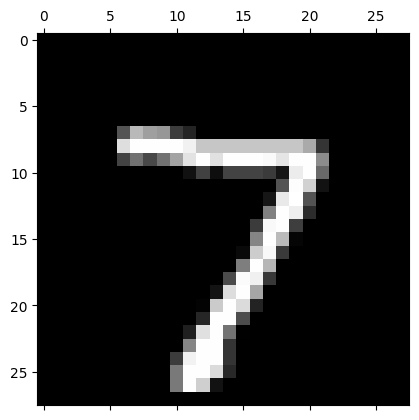

In [61]:
plt.gray()
plt.matshow(X_test[0])

In [62]:
y_predicted = model2.predict(X_test_scaled)
print(y_predict[0])
print(f"Number: {np.argmax(y_predict[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
[4.7666289e-02 3.3661121e-07 8.3554693e-02 9.6391201e-01 2.4814680e-03
 1.0684880e-01 1.4432891e-06 9.9983412e-01 6.4968601e-02 6.6410881e-01]
Number: 7


In [63]:
ls = []
for i in range(len(y_test)):
    ls.append(np.argmax(y_predicted[i]))
   
print(ls)
nd_predicted = np.array(ls)
nd_predicted

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 5, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

array([7, 2, 1, ..., 4, 5, 6])

In [64]:
pred_comp = [np.argmax(x) for x in y_predicted]

Text(0.5, 1.0, 'Confusion Matrix')

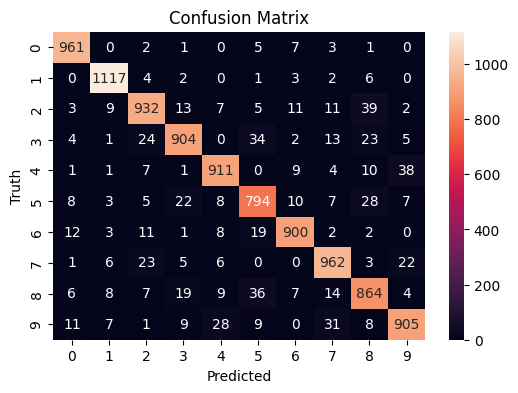

In [77]:
import seaborn as sns
cm  = tf.math.confusion_matrix(y_test,pred_comp)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")

In [66]:
X_test_flatten.shape

(10000, 784)

In [68]:
# Neural Network with Hidden Layers
model3 = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,), activation= "relu"),
    keras.layers.Dense(10, activation= "sigmoid")
])

model3.compile(
    optimizer = "adam",
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model3.fit(X_train_scaled,y_train,epochs = 10)



/home/prasun/python_workspace/penv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8716 - loss: 0.4589
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9615 - loss: 0.1314
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9747 - loss: 0.0880
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9808 - loss: 0.0632
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9854 - loss: 0.0488
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9874 - loss: 0.0397
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9910 - loss: 0.0311
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9919 - loss: 0.0261
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0221
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9947 - loss: 0.0185


In [69]:
model3.evaluate(X_test_scaled,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9694 - loss: 0.1019


[0.08584514260292053, 0.9747999906539917]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0.5, 1.0, 'Modified Confusion Matrix')

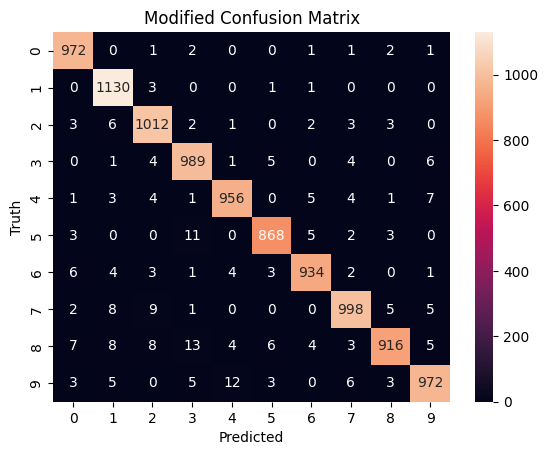

In [78]:
y_hpredicted = model3.predict(X_test_scaled)
y_label = [np.argmax(i) for i in y_hpredicted]
cm2 = tf.math.confusion_matrix(y_test,y_label)
sns.heatmap(cm2,annot= True, fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Modified Confusion Matrix")